In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
('2017-08-23',)
2016-08-24
[('USC00514830', 11.53), ('USC00519281', 9.64), ('USC00516128', 8.06), ('USC00513117', 7.65), ('USC00519523', 6.38), ('USC00518838', 6.3), ('USC00519397', 4.2), ('USC00511918', 4.0), ('USC00517948', 2.8)]
         date  prcp
0  2016-08-24  0.08
1  2016-08-24  2.15
2  2016-08-24  2.28
3  2016-08-24   NaN
4  2016-08-24  1.22
5  2016-08-24  2.15
6  2016-08-24  1.45
7  2016-08-25  0.08
8  2016-08-25  0.08
9  2016-08-25  0.00


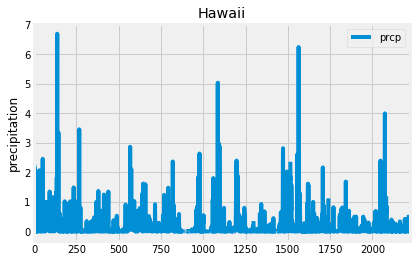

<Figure size 1008x720 with 0 Axes>

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

inspector = sqlalchemy.inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
        print(c['name'],c["type"])
        
# Calculate the date 1 year ago from the last data point in the database

latestdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(latestdate)
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 30.4*12)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores   # Sort the dataframe by date                                               
rain_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= "2016-08-24").\
    filter(Measurement.date <=  "2017-08-23").\
    order_by(Measurement.date).all()                                           
#print(rain_data)

prcpmax = session.query(Measurement.station,func.max(Measurement.prcp)).group_by(Measurement.station).order_by(func.max(Measurement.prcp).desc()).all()
print(prcpmax)
# Save the query results as a Pandas DataFrame and set the index to the date column 

rain_df = pd.DataFrame(rain_data, \
                 columns=['date','prcp'])
rain_df.set_index('date')
print(rain_df.head(10))
#print(rain_df)

# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot.line()
#plt.xticks("date")
plt.y = ("prcp")
#plt.xlabel("date")
plt.ylabel("precipitation")
plt.title("Hawaii")
plt.grid(True)
plt.figure(figsize=(14, 10))
plt.tight_layout()
plt.show()


![precipitation](Images/precipitation.png)

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data  #summary stats
rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [21]:
# Design a query to show how many stations are available in this dataset?
stationquantity = session.query(Station.name).count()
print(stationquantity)

9


In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts inamen descending order.
active = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
list(active)


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
#func.min, func.max, func.avg, and func.count
# highest temperature recorded, and average temperature most active station?
####               MEASUREMENT        MINIMUM TEMP PER STATION
tempmin = session.query(Measurement.station,func.min(Measurement.tobs)).group_by(Measurement.station).order_by(func.min(Measurement.tobs).desc()).all()
print(tempmin)
######             MEASUREMENT        AVERAGE TEMP PER STATION
tempavg= session.query(Measurement.station,func.avg(Measurement.tobs)).group_by(Measurement.station).order_by(func.avg(Measurement.tobs).desc()).all()
print(tempavg)
######            MEASURE             MAXIMUM TEMP   PER STATION
tempmax = session.query(Measurement.station,func.max(Measurement.tobs)).group_by(Measurement.station).order_by(func.max(Measurement.tobs).desc()).all()
print(tempmax)
#                                       SUMMARIZE STATION 9281 FOR MIN, MAX, AVG
statactive = session.query(Measurement.station,func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).group_by(Measurement.station).\
    filter(Measurement.station =='USC00519281').all()
    
print(statactive)              

[('USC00513117', 59.0), ('USC00514830', 58.0), ('USC00516128', 58.0), ('USC00517948', 58.0), ('USC00518838', 58.0), ('USC00519397', 56.0), ('USC00519523', 56.0), ('USC00519281', 54.0), ('USC00511918', 53.0)]
[('USC00514830', 74.8732970027248), ('USC00517948', 74.68440233236151), ('USC00519397', 74.55323054331865), ('USC00519523', 74.5436493068565), ('USC00518838', 72.72407045009784), ('USC00513117', 72.68918420081211), ('USC00519281', 71.66378066378067), ('USC00511918', 71.61596766043456), ('USC00516128', 70.91500765696784)]
[('USC00511918', 87.0), ('USC00517948', 87.0), ('USC00519397', 87.0), ('USC00513117', 85.0), ('USC00514830', 85.0), ('USC00519281', 85.0), ('USC00519523', 85.0), ('USC00516128', 84.0), ('USC00518838', 83.0)]
[('USC00519281', 85.0, 54.0, 71.66378066378067)]


('2017-08-18',)
2016-08-19
          date  tobs
0   2016-08-19  79.0
1   2016-08-20  81.0
2   2016-08-21  79.0
3   2016-08-22  78.0
4   2016-08-23  77.0
5   2016-08-24  77.0
6   2016-08-25  80.0
7   2016-08-26  80.0
8   2016-08-27  75.0
9   2016-08-28  73.0
10  2016-08-29  78.0
11  2016-08-30  77.0
12  2016-08-31  78.0
13  2016-09-01  80.0
14  2016-09-02  80.0
15  2016-09-03  78.0
16  2016-09-04  78.0
17  2016-09-05  78.0
18  2016-09-06  73.0
19  2016-09-07  74.0


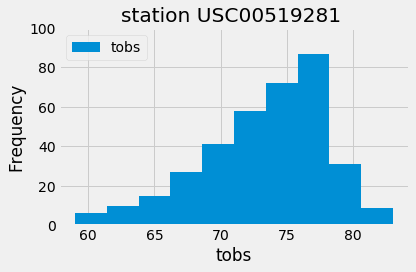

In [52]:
# Choose the station with the highest number of temperature observations.  
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


active_stat_latestdate = session.query(Measurement.date).filter(Measurement.station =='USC00519281').\
    order_by(Measurement.date.desc()).first()
print(active_stat_latestdate)

#### active station 12 month interval data_
year_ago_hist = dt.date(2017, 8, 18) - dt.timedelta(days = 30.4*12)
print(year_ago_hist)
temp_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station=='USC00519281').\
    filter(Measurement.date >= "2016-08-19").\
    filter(Measurement.date <=  "2017-08-18").\
    order_by(Measurement.date).all()    
#print(temp_data)

temp_df = pd.DataFrame(temp_data, \
                 columns=['date','tobs'])
print(temp_df.head(20))

#######
#histogram of temperature observations
explore_temp_hist = temp_df
explore_temp_hist.plot.hist()
bins = 12
plt.ylim(0, 100)
plt.xlabel("tobs")
plt.ylabel("Frequency")
plt.title("station USC00519281 ")
#plt.grid(True)
plt.tight_layout()
plt.show()

![precipitation](Images/station-histogram.png)

In [63]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temp('2011-02-28', '2011-03-11'))

[(61.0, 70.49484536082474, 79.0)]


   tmin       tavg  tmax  error
0  61.0  70.494845  79.0   18.0


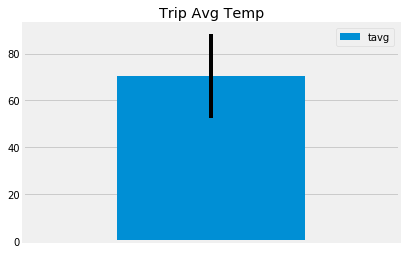

In [26]:
# Plot the results from your previous query as a bar chart. 
tripavtemp_df = pd.DataFrame(calc_temps('2011-02-28', '2011-03-11'),columns=["tmin","tavg","tmax"])
tripavtemp_df["error"] = tripavtemp_df["tmax"] - tripavtemp_df["tmin"] #create column for the error range
print(tripavtemp_df.head(10))

# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
tripavtemp_df.plot(y="tavg", kind="bar", yerr ="error")

plt.xticks([])

plt.title("Trip Avg Temp")
plt.grid(True)

plt.show()

In [61]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

raintotal=session.query(Measurement.station,func.sum(Measurement.prcp),Station.name,Station.latitude,Station.longitude,Station.elevation).\
    filter(Measurement.date >= "2011-02-28").\
    filter(Measurement.date <=  "2011-03-11").\
    filter(Measurement.station==Station.station).\
    group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all() 

print(raintotal)

[('USC00519281', 6.879999999999999, 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9), ('USC00516128', 5.88, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4), ('USC00514830', 4.209999999999999, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), ('USC00513117', 4.129999999999999, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6), ('USC00519523', 3.8699999999999997, 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5), ('USC00518838', 3.46, 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6), ('USC00519397', 1.7599999999999998, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0), ('USC00511918', 0.81, 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9), ('USC00517948', None, 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


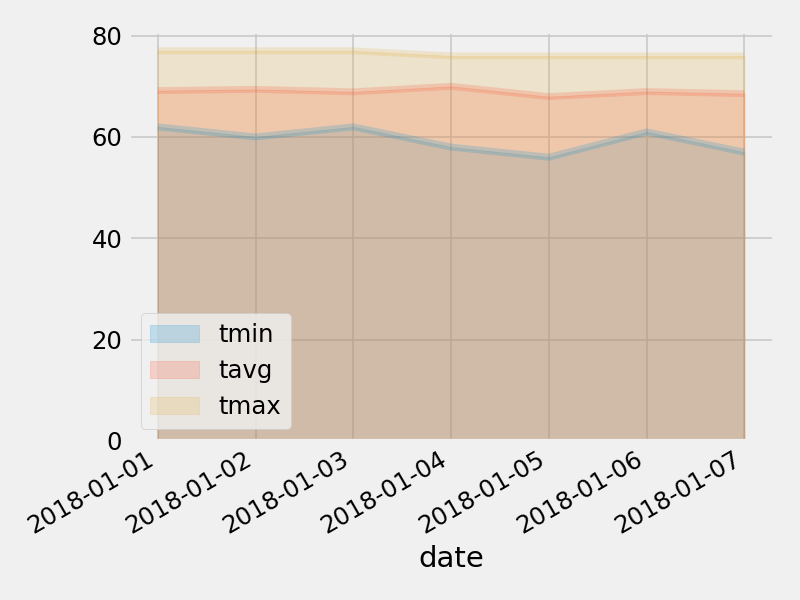

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
